Praktikum zu Vorlesung
[__Modellreduktion parametrisierter Systeme__](https://www.uni-muenster.de/AMM/Veranstaltungen/SS19/Modellreduktion/)

Mario Ohlberger, Felix Schindler

# Blatt 03, 24.04.2019

* Aktivieren Sie wie gewohnt ihre Arbeitsumgebung und starten Sie den Jupyter Notebook server, siehe zB [Blatt 1, Aufgabe 0](https://www.uni-muenster.de/AMM/Veranstaltungen/SS19/Modellreduktion/blatt_01__aufgaben.html#Aufgabe-0:-jupyter-Notebook-Server-starten).

* Erstellen Sie ein neues `Python 3` Notebook oder laden Sie dieses von der Homepage herunter.

* Importieren Sie `numpy` und `pymor.basic` und machen Sie `matplotlib` für das Notebook nutzbar.

In [1]:
%matplotlib notebook
import numpy as np
from pymor.basic import *

## Aufgabe 1: vereinfachtes Diffusionsproblem mit pyMOR diskretisieren

Wir betrachten wieder das vereinfachte Diffusionsproblem aus [Blatt 02](https://www.uni-muenster.de/AMM/Veranstaltungen/SS19/Modellreduktion/blatt_02__aufgaben.html#vereinfachtes-paramter-unabh%C3%A4ngiges-Diffusionsproblem), mit dem Gebiet und den Datenfunktionen aus [Blatt 02, Aufgabe 4](https://www.uni-muenster.de/AMM/Veranstaltungen/SS19/Modellreduktion/blatt_02__aufgaben.html#Aufgabe-4:-l%C3%B6sen-des-vereinfachten-Diffusionsproblems).

Modellieren Sie das vereinfachte Diffusionsproblem mit Hilfe eines analytischen Problems in pyMOR und nutzen Sie einen _Diskretizer_, um eine Diskretisierung des Problems zu erhalten.

1. Machen Sie sich mit der Klasse `StationaryProblem` vertraut und legen Sie ein `problem_1` an, welches die gewünschten Datenfunktionen enthält.

In [2]:
#StationaryProblem?

In [3]:
problem_1 = StationaryProblem(
    domain=RectDomain([[-1., -1.], [1., 1.]]),
    diffusion=ConstantFunction(1, 2),
    rhs=ExpressionFunction('0.5 * np.pi**2 * np.cos(0.5 * np.pi * x[..., 0]) * np.cos(0.5 * np.pi * x[..., 1])', 2, ()),
)

2. Visualisieren Sie die Diffusion und rechte Seite des Problems.
   - Legen Sie dazu ein feines `TriaGrid` an.
   - Nutzen Sie die Funktionen aus `interpolations.py` und `visualizations.py`.

<IPython.core.display.Javascript object>


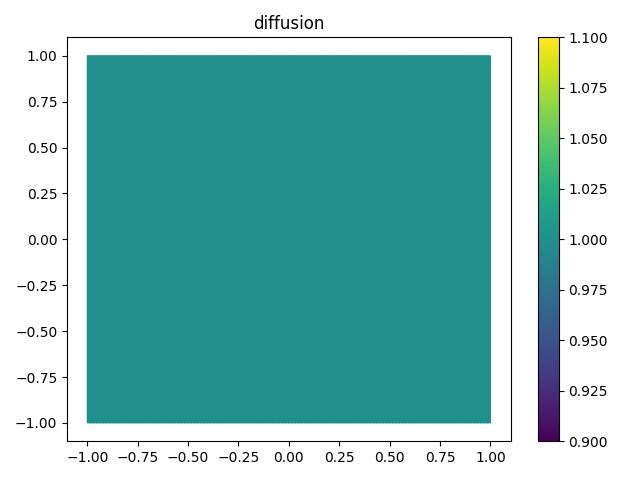

<IPython.core.display.Javascript object>


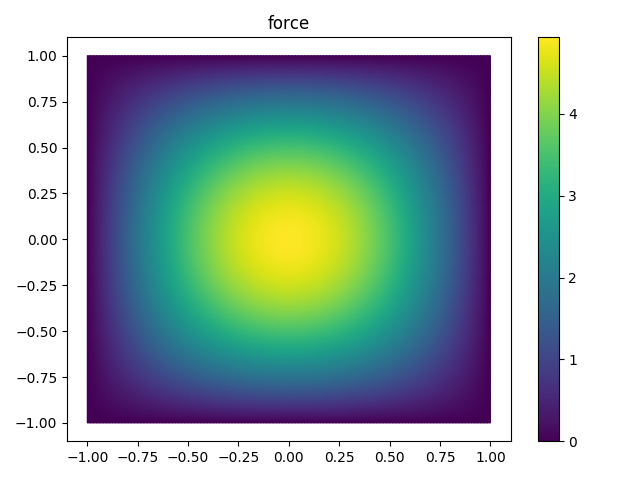

In [4]:
from interpolations import (interpolate_fv, interpolate_lagrange_p1)
from visualizations import (visualize_fv, visualize_grid, visualize_lagrange_p1)

visualization_grid = TriaGrid(domain=problem_1.domain.domain, num_intervals=(128, 128))
visualize_lagrange_p1(interpolate_lagrange_p1(problem_1.diffusion, visualization_grid), visualization_grid, 'diffusion')
visualize_lagrange_p1(interpolate_lagrange_p1(problem_1.rhs, visualization_grid), visualization_grid, 'force')

3. Diskretisieren Sie das stationäre Problem mit einer CG Diskretisierung, indem Sie die entsprechende Funktion aus dem [pymor.discretizers](http://docs.pymor.org/en/0.5.1/generated/pymor.discretizers.html) Paket verwenden.
  - Rufen Sie diese Funktion nur mit dem analytischen Problem und $\tfrac{1}{2}$ als maximalem Durchmesser für die Gitterelemente auf.
  - Was ist der Rückgabewert des _Discretizers_?

In [5]:
#discretize_stationary_cg?

In [6]:
d, data = discretize_stationary_cg(problem_1, diameter=1/2)

00:01 L2ProductP1: Integrate the products of the shape functions on each element
00:01 L2ProductP1: Determine global dofs ...
00:01 L2ProductP1: Boundary treatment ...
00:01 L2ProductP1: Assemble system matrix ...
00:01 DiffusionOperatorP1: Calulate gradients of shape functions transformed by reference map ...
00:01 DiffusionOperatorP1: Calculate all local scalar products beween gradients ...
00:01 DiffusionOperatorP1: Determine global dofs ...
00:01 DiffusionOperatorP1: Boundary treatment ...
00:01 DiffusionOperatorP1: Assemble system matrix ...
00:01 L2ProductP1: Integrate the products of the shape functions on each element
00:01 L2ProductP1: Determine global dofs ...
00:01 L2ProductP1: Boundary treatment ...
00:01 L2ProductP1: Assemble system matrix ...
00:01 DiffusionOperatorP1: Calulate gradients of shape functions transformed by reference map ...
00:01 DiffusionOperatorP1: Calculate all local scalar products beween gradients ...
00:01 DiffusionOperatorP1: Determine global dofs ..

In [7]:
print(data.keys())

dict_keys(['grid', 'boundary_info', 'unassembled_d'])


4. Lassen Sie sich von der resultierenden [Diskretisierung](http://docs.pymor.org/en/0.5.1/generated/pymor.discretizations.html#pymor.discretizations.interfaces.DiscretizationInterface) den assemblierten Operator $B$, die assemblierte rechte Seite $l$ und den Approximationsraum $S_h^1$ anzeigen.

In [8]:
print(d.operator)
print(d.rhs)
print(d.solution_space)

NumpyMatrixOperator: R^41 --> R^41  (parameter type: None, class: NumpyMatrixOperator)
L2ProductFunctionalP1: R^1 --> R^41  (parameter type: None, class: NumpyMatrixOperator)
NumpyVectorSpace(41, STATE)


5. Lassen Sie sich außerdem alle assemblierten Produkte anzeigen.

In [9]:
for id, prod in d.products.items():
    print('{}: {}'.format(id, prod))

h1: NumpyMatrixOperator: R^41 --> R^41  (parameter type: None, class: NumpyMatrixOperator)
h1_semi: h1_semi: R^41 --> R^41  (parameter type: None, class: NumpyMatrixOperator)
l2: l2: R^41 --> R^41  (parameter type: None, class: NumpyMatrixOperator)
h1_0: NumpyMatrixOperator: R^41 --> R^41  (parameter type: None, class: NumpyMatrixOperator)
h1_0_semi: h1_0_semi: R^41 --> R^41  (parameter type: None, class: NumpyMatrixOperator)
l2_0: l2_0: R^41 --> R^41  (parameter type: None, class: NumpyMatrixOperator)


6. Nutzen Sie die Diskretisierung, um das vereinfachte Diffusionsproblem zu lösen.
   - Was erhalten Sie als Lösung?
   - Stellen Sie sicher, dass die Lösung im korrekten Vektorraum enthalten ist!

In [10]:
U = d.solve()
print(type(U))
print(len(U))
print(U.dim)
assert U.space == d.solution_space

00:01 StationaryDiscretization: Solving StationaryProblem_CG for {} ...


<class 'pymor.vectorarrays.numpy.NumpyVectorArray'>
1
41


7. Visualisieren Sie die Lösung mit Hilfe der Diskretisierung.

<IPython.core.display.Javascript object>


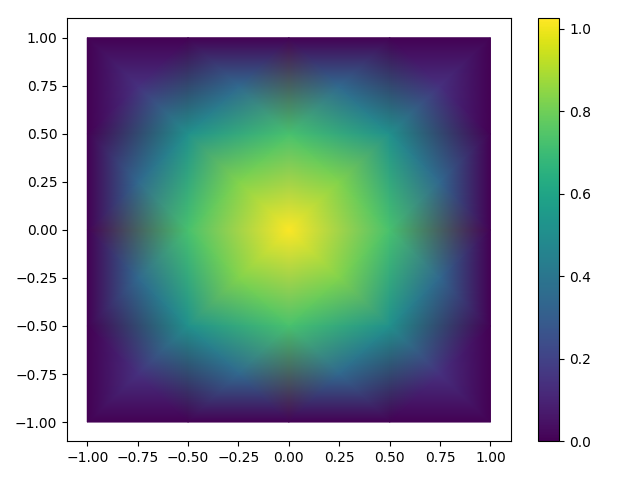

In [11]:
d.visualize(U)

8. Nutzen Sie denselben Diskretizer, um das Problem auf einem Vierecksgitter zu diskretisieren und zu lösen, visualisieren Sie die Lösung.

00:01 L2ProductQ1: Integrate the products of the shape functions on each element
00:01 L2ProductQ1: Determine global dofs ...
00:01 L2ProductQ1: Boundary treatment ...
00:01 L2ProductQ1: Assemble system matrix ...
00:01 DiffusionOperatorQ1: Calulate gradients of shape functions transformed by reference map ...
00:01 DiffusionOperatorQ1: Calculate all local scalar products beween gradients ...
00:01 DiffusionOperatorQ1: Determine global dofs ...
00:01 DiffusionOperatorQ1: Boundary treatment ...
00:01 DiffusionOperatorQ1: Assemble system matrix ...
00:01 L2ProductQ1: Integrate the products of the shape functions on each element
00:01 L2ProductQ1: Determine global dofs ...
00:01 L2ProductQ1: Boundary treatment ...
00:01 L2ProductQ1: Assemble system matrix ...
00:01 DiffusionOperatorQ1: Calulate gradients of shape functions transformed by reference map ...
00:01 DiffusionOperatorQ1: Calculate all local scalar products beween gradients ...
00:01 DiffusionOperatorQ1: Determine global dofs ..

<IPython.core.display.Javascript object>


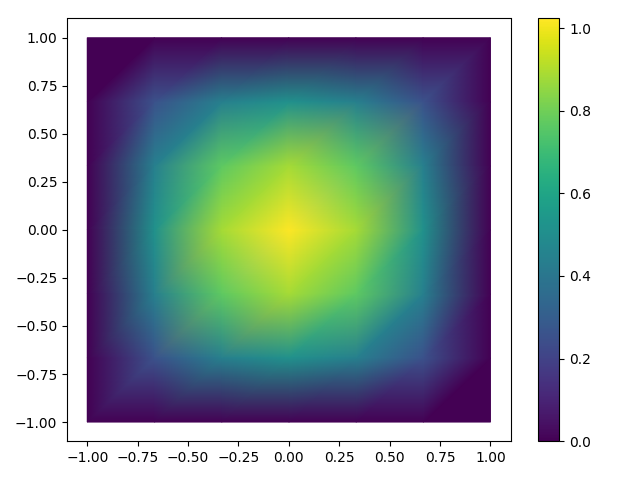

In [12]:
d, _ = discretize_stationary_cg(problem_1, diameter=1/2, grid_type=RectGrid)
d.visualize(d.solve())

9. Diskretisieren Sie dasselbe Problem mit Hilfe einer Finite Volumen Diskretisierung für verschiedene Gittertypen und dieselbe Gitterweite $\tfrac{1}{2}$, visualisieren Sie die Lösungen.

   - Falls Sie die Meldungen von pyMOR einschränken wollen, können Sie
     ```python
     set_log_levels({'pymor': 'WARN'})
     ```
     verwenden.

   -  Vergleichen Sie die Lösungen für CG und FV.

In [13]:
set_log_levels({'pymor': 'WARN'})

<IPython.core.display.Javascript object>


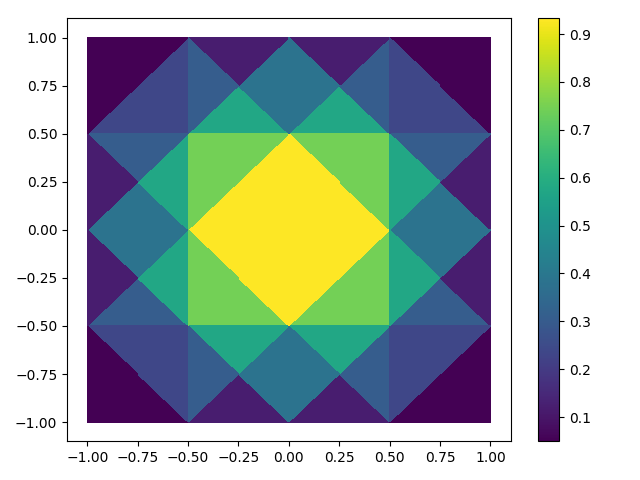

In [14]:
d, _ = discretize_stationary_fv(problem_1, diameter=1/2, grid_type=TriaGrid)
d.visualize(d.solve())

<IPython.core.display.Javascript object>


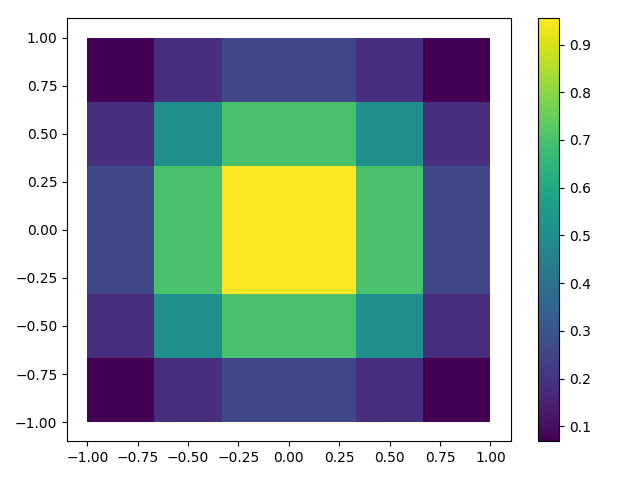

In [15]:
d, _ = discretize_stationary_fv(problem_1, diameter=1/2, grid_type=RectGrid)
d.visualize(d.solve())

## Aufgabe 2: Neumann Ränder

Wir betrachten parameter-unabhängige Diffusionsprobleme.
Sei dazu

* $\Omega \subset \mathbb{R}^d$, $d = 1, 2, 3$ eine beschränktes zusammenhängendes Gebiet mit 
* Lipschitz-Rand $\partial \Omega$, der sich in einen

  - nichtleeren Dirichlet Rand $\Gamma_\text{D} \subseteq \partial \Omega$ und einen
  - Neumann Rand $\Gamma_\text{N} := \partial \Omega \backslash \Gamma_\text{D}$
  
  mit $\Gamma_\text{D} \cap \Gamma_\text{N} = \emptyset$ und $\Gamma_\text{D} \cup \Gamma_\text{N} = \partial \Omega$ aufteilt.

Sei außerdem 
* eine Diffusion $A \in L^\infty(\Omega)$, 
* eine rechte Seite $f \in L^2(\Omega)$, 
* Dirichlet Randwerte $g_\text{D} \in H^{-1/2}(\Gamma_\text{D})$ und
* Neumann Randwerte $g_\text{N} \in H^{-1/2}(\Gamma_\text{N})$,

gegeben.
Gesucht ist eine schwache Lösung $u \in H^1(\Omega)$, sodass

$$\begin{align}
-\nabla\cdot( A \nabla u ) &= f &&\text{in } \Omega\\
u &= g_\text{D} &&\text{auf } \Gamma_\text{D}\\
- (A \nabla u) \cdot n &= g_\text{N} &&\text{auf } \Gamma_\text{N}\\
\end{align}$$

im schwachen Sinne, wobei $n \in \mathbb{R}^d$ die aüßere Normale an den Gebietsrand $\partial \Omega$ sei.

Approximieren Sie die Lösung dieses Problems auf dem Gebiet

* $\Omega = [0, 1]^2$
* $\Gamma_\text{N} = [0, 1] \times \{0\}$
* $\Gamma_\text{D} = \partial\Omega \backslash \Gamma_\text{N}$

für die Datenfunktionen

* $A(x) := \begin{cases}0.001, &&\big|x - (\tfrac{1}{2}, \tfrac{1}{2})\big| < 0.3\\1, &&\text{sonst}\end{cases}$
* $f = 0$
* $g_\text{D} = 0$
* $g_\text{N} = -1$

1. Legen Sie ein entsprechendes analytisches Problem `problem_2` an. _Beachten Sie dass die Definition der Randwerte schon im Problem erfolgen muss._

In [16]:
problem_2 = StationaryProblem(
    domain=RectDomain(bottom='neumann'),
    diffusion=ExpressionFunction('1. - (np.sqrt( (x[...,0]-0.5)**2 + (x[...,1]-0.5)**2) <= 0.3) * 0.999' , 2, ()),
    neumann_data=ConstantFunction(-1, 2)
)

2. Diskretisieren Sie das analytische Problem mit dem CG Verfahren mit einer Gitterweite von höchstens $\tfrac{1}{32}$ und visualisieren Sie die Lösung.

<IPython.core.display.Javascript object>


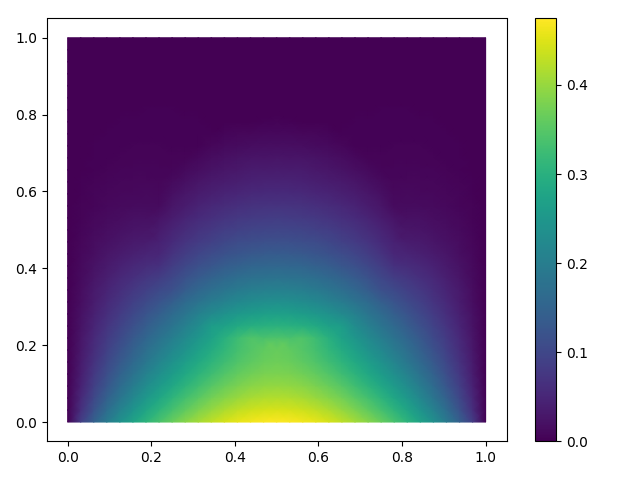

In [17]:
d, data = discretize_stationary_cg(problem_2, diameter=1/32)
d.visualize(d.solve())

3. Visualisieren Sie $A$ mit Hilfe der Diskretisierung.

<IPython.core.display.Javascript object>


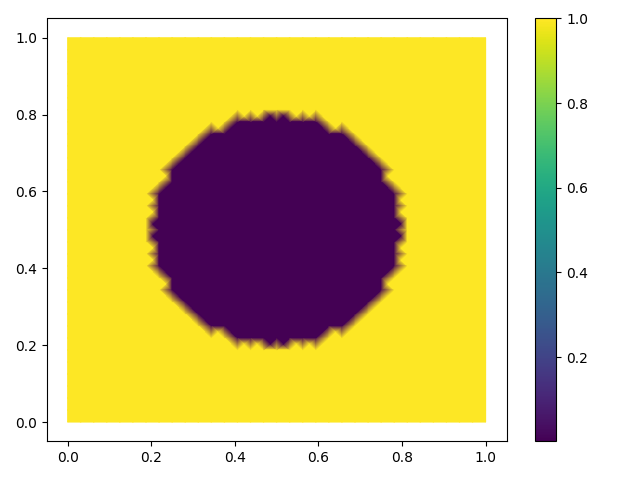

In [18]:
d.visualize(interpolate_lagrange_p1(problem_2.diffusion, data['grid']))

4. Lassen Sie sich die $L^\infty$-Norm des Vektors des assemblierten Rechte-Seite-Funktionals $l$ der Diskretisierung anzeigen.

In [19]:
print(d.rhs.as_vector().sup_norm())

[0.03125]


5. Extrahieren Sie aus den bei der Diskretisierung anfallenden Daten das Rechte-Seite Funktional $l$ der nicht assemblierten Diskretisierung.

   - Was ist $l$?
   - Lassen Sie sich die Koeffizienten der Linearkombination von $l$ anzeigen und extrahieren Sie das zu $f$ und das zu $g_\text{N}$ assoziierte Funktional.
   - Assemblieren Sie diese und lassen Sie sich die jeweilige $L^\infty$-Norm des assemblierten Vektors anzeigen.

In [20]:
ud = data['unassembled_d']
print(type(ud.rhs))
print(ud.rhs.coefficients)
print(ud.rhs.operators)

l_f = ud.rhs.operators[0].assemble()
l_gN = ud.rhs.operators[1].assemble()
print(l_f.as_vector().sup_norm())
print(l_gN.as_vector().sup_norm())

<class 'pymor.operators.constructions.LincombOperator'>
(1.0, 1.0)
(<pymor.operators.cg.L2ProductFunctionalP1 object at 0x7f8f744eca20>, <pymor.operators.cg.BoundaryL2ProductFunctionalP1 object at 0x7f8f744ecc18>)
[0.]
[0.03125]


## Aufgabe 3: parametrische Neumannwerte

Wir betrachten das Problem aus Aufgabe 2 mit parametrischen Neumann Randwerten $g_{\text{N}, \mu}$, d.h. für jeden Parameter $\mu \in \mathbb{R}$ ist $g_{\text{N}, \mu} \in H^{-1/2}(\Gamma_\text{N})$ und wir suchen zu einem Parameter $\mu \in \mathbb{R}$ eine schwache Lösung $u_\mu \in H^1(\Omega)$, sodass

$$\begin{align}
-\nabla\cdot( A \nabla u_\mu ) &= f &&\text{in } \Omega\\
u_\mu &= g_\text{D} &&\text{auf } \Gamma_\text{D}\\
- (A \nabla u_\mu) \cdot n &= g_{\text{N}, \mu} &&\text{auf } \Gamma_\text{N}\\
\end{align}$$


Approximieren Sie die Lösungen dieses Problems für verschiedene Parameter auf dem Gebiet wie oben und zu den Datenfunktionen wie oben, aber mit

* $g_{\text{N}, \mu}(x, y) := -\cos(\pi x_0)^2 \mu$

1. Legen Sie eine `ExpressionFunction` für $g_{\text{N}, \mu}$ an

   - Machen Sie sich mit dem ersten Absatz der [pyMOR Dokumentation zu parametrischen Objekten](http://docs.pymor.org/en/0.5.1/generated/pymor.parameters.html#module-pymor.parameters.base) vertraut, was ist ein Parameter (zur Modellierung von $\mu$) in pyMOR, was ein Parametertyp?
   - Lesen Sie die Dokumentation zur `ExpressionFunction`, um die Neumann Randwerte als parametrische Funktion mit einem skalaren Parameter zu definieren (nennen Sie diesen z.B. `'neum'`).
   - Lassen Sie sich die Repräsentation der resultierende Funktion, ihren Paramtertypen sowie dessen Python-Typen ausgeben.

In [21]:
#ExpressionFunction?

In [22]:
g_N = ExpressionFunction('-cos(pi*x[...,0])**2 * neum', 2, (), parameter_type={'neum': ()})
print(g_N)
g_N.__repr__()

ExpressionFunction: x -> <function ExpressionFunction.__init__.<locals>.<lambda> at 0x7f8f74709f28>


"ExpressionFunction(-cos(pi*x[...,0])**2 * neum, ParameterType({'neum': ()}), (), {'neum': ()}, {})"

In [23]:
print(g_N.parameter_type)
print(type(g_N.parameter_type))

{'neum': ()}
<class 'pymor.parameters.base.ParameterType'>


2. Werten Sie die Funktion für verschiedene Punkte auf dem Neumann Rand und verschiedene Parameter aus.

   - Legen Sie dazu einen `Parameter`-Object `mu` an, welches $\mu = 1$ modelliert, lassen Sie sich den Paramter anzeigen und werten Sie die Funktion für dieses $\mu$ aus.
   - Finden Sie einfachere Wege, die Funktion für diesen und andere Parameterwerte auszuwerten.

In [24]:
mu = Parameter({'neum': 1})
print(mu)
bottom_points = np.array([[0, 0], [0.5, 0], [1, 0]])
print(g_N.evaluate(bottom_points, mu))
print(g_N.evaluate(bottom_points, {'neum': 1}))
print(g_N.evaluate(bottom_points, {'neum': -2}))
print(g_N.evaluate(bottom_points, -2))

{neum: 1}
[-1.00000000e+00 -3.74939946e-33 -1.00000000e+00]
[-1.00000000e+00 -3.74939946e-33 -1.00000000e+00]
[2.00000000e+00 7.49879891e-33 2.00000000e+00]
[2.00000000e+00 7.49879891e-33 2.00000000e+00]


3. Versuchen Sie mit dem parametrischen $g_{\text{N}, \mu}$ die Neumann Randwerte des `problem_2` Objektes zu ersetzen, um ein neues analytisches Problem zu erhalten. Warum schlägt dies fehl? (_Hinweis_: nutzen Sie die `mro` Funktion aus dem `inspect` Modul, um sich alle Basisklassen des Typs von `problem_2` anzeigen zu lassen)

In [25]:
problem_3 = problem_2
#problem_3.neumann_data = g_N # <= funktioniert nicht

import inspect
inspect.getmro(type(problem_2))

(pymor.analyticalproblems.elliptic.StationaryProblem,
 pymor.core.interfaces.ImmutableInterface,
 pymor.core.interfaces.BasicInterface,
 object)

4. Machen Sie sich mit den entsprechenden [Konzepten in pyMOR](http://docs.pymor.org/en/0.5.1/technical_overview.html#base-classes) vertraut und legen Sie ein `problem_3` als veränderte Kopie des `problem_2` an, wobei nur die Neumann Randwerte ausgetauscht wurde.

In [26]:
problem_3 = problem_2.with_(neumann_data=g_N)

5. Diskretisieren Sie `problem_3` mit dem CG Verfahren mit einer Gitterweite von höchstens $\tfrac{1}{32}$. Ist die Diskretisierung parametrisch? Wenn ja, lassen Sie sich den entsprechenden Parametertypen anzeigen.

In [27]:
d, data = discretize_stationary_cg(problem_3, diameter=1/32)
print(d.parametric)
print(d.parameter_type)

True
{'neum': ()}


6. Lassen Sie sich den Linke-Seite-Operator und das Rechte-Seite-Funktional der Diskretisierung anzeigen. Sind diese parametrisch? Lassen Sie sich die entsprechenden Parametertypen anzeigen.

In [28]:
lhs = d.operator
print(lhs)
print(lhs.parametric)
print(lhs.parameter_type)
rhs = d.rhs
print(rhs)
print(rhs.parametric)
print(rhs.parameter_type)

NumpyMatrixOperator: R^2113 --> R^2113  (parameter type: None, class: NumpyMatrixOperator)
False
None
LincombOperator: R^1 --> R^2113  (parameter type: {'neum': ()}, class: LincombOperator)
True
{'neum': ()}


7. Ist das Rechte-Seite-Funktional assembliert? Lassen Sie sich gegebenenfalls den Paramtertypen aller Funktionale der Linearkombination anzeigen.

In [29]:
print(type(rhs)) # <= nicht assembliert
for func in rhs.operators:
    print(func)

<class 'pymor.operators.constructions.LincombOperator'>
L2ProductFunctionalP1: R^1 --> R^2113  (parameter type: None, class: NumpyMatrixOperator)
BoundaryL2ProductFunctionalP1: R^1 --> R^2113  (parameter type: {'neum': ()}, class: BoundaryL2ProductFunctionalP1)


8. Berechnen Sie die Lösung für verschiedene Paramter $\mu$ (analog zur Auswertung von $g_{\text{N}, \mu}$) und visualisieren Sie diese.

<IPython.core.display.Javascript object>


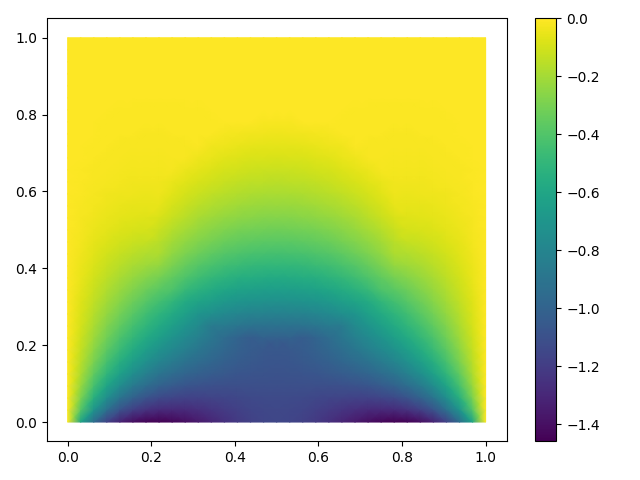

<IPython.core.display.Javascript object>


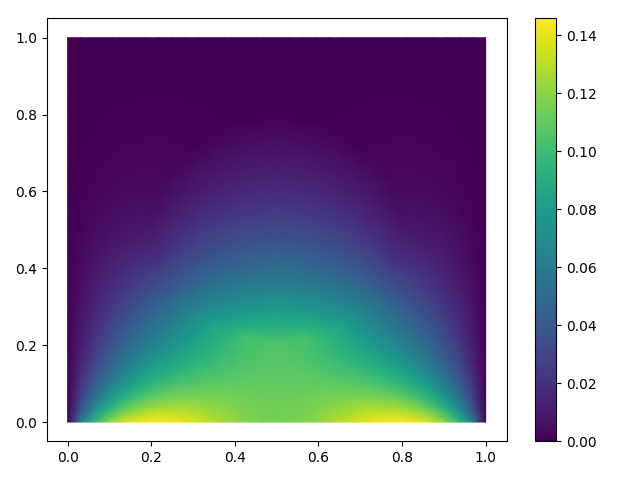

<IPython.core.display.Javascript object>


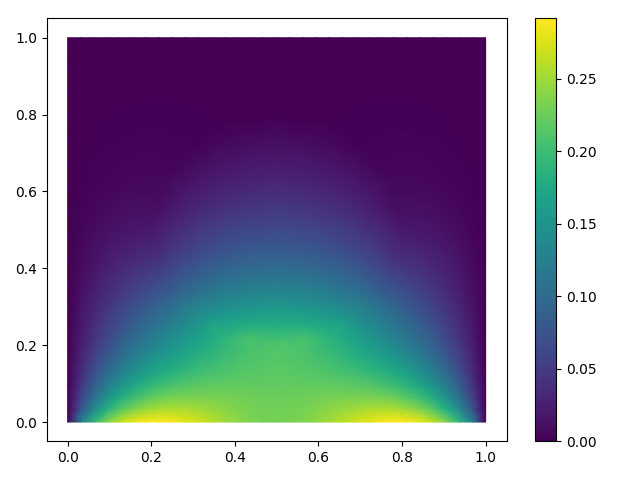

In [32]:
for mu in -10, 1, 2:
    d.visualize(d.solve(mu))

9. Lassen Sie sich die Summe der Lösungen $u_{\mu_1} + u_{\mu_2}$, für die Parameter $\mu_1 = 1$ und $\mu_2 = -1$ anzeigen und verifizieren Sie das Ergebnis.

<IPython.core.display.Javascript object>


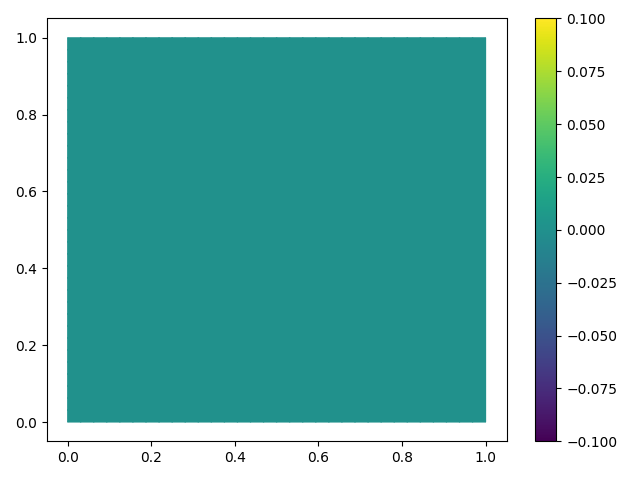

In [31]:
U_1 = d.solve(mu={'neum': 1})
U_2 = d.solve(mu={'neum': -1})
d.visualize(U_1 + U_2)

Da $g_{\text{N}, \mu_1} = -g_{\text{N}, \mu_2}$ und $f = 0$ gilt $u_{\mu_1} = - u_{\mu_2}$, also $u_{\mu_1} + u_{\mu_2} = 0$.